In [10]:
import indicoio, json, re
from urlextract import URLExtract
import numpy as np
import matplotlib.pyplot as plt
import datetime




In [11]:
indicoio.config.api_key = '797527d8dbe8cbb44e9a4019cd690afd'


In [13]:
with open('parkland.json', 'r') as myfile:
    data = json.loads(myfile.read())


count = 0
    
for x in data['comments']:
    count += 1

print("Number of comments in our dataset")
print(count)
    
    

Number of comments in our dataset
50500


In [29]:

    
extractor = URLExtract()

timestamp = []
sentiment = []
political = []



num = 0
for x in data['comments']:
    num += 1
    
    
    
    # TEXT CLEANING
    input_str = data['comments'][x]['body'].lower() # all letters become lowercase    
    url = extractor.find_urls(input_str)          # extracts and removes url
    if(len(url) != 0):
        input_str = input_str.replace(url[0],'')

    input_str = re.sub(r'\d+', '', input_str)     # removes numbers
    input_str = input_str.strip()                 # removes whitespace
    input_str = re.sub(r'[^\w\s]','',input_str)   # removes punctuation
    
    
    
    # STORING THE TIMESTAMP, SENTIMENT, POLITICAL DATA IN SEPARATE LISTS
    if( 'timestamp' in data['comments'][x] and input_str):
        timestamp.append(data['comments'][x]['timestamp'])
        sentiment.append(indicoio.sentiment(input_str))
        political.append(indicoio.political(input_str))

        
    if(num == 2000):
        break


        
        






In [30]:
# Parsed the timestamp to create a list of datatime objects

from datetime import datetime


time = []

for x in timestamp:
    parsed_date = datetime.utcfromtimestamp(int(x))
    year = parsed_date.year
    month = parsed_date.month
    day = parsed_date.day
    hour = parsed_date.hour
    minute = parsed_date.minute
    customdate = datetime(year, month, day, hour, minute)
    time.append(customdate)
    
    






In [31]:
libertarian = []
liberal = []
conservative = []
green = []


for x in political:
    libertarian.append(x['Libertarian'])
    liberal.append(x['Liberal'])
    conservative.append(x['Conservative'])
    green.append(x['Green'])

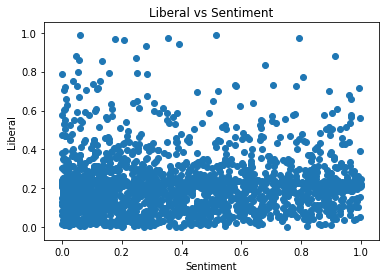

In [32]:
plt.scatter(sentiment, liberal)
plt.title('Liberal vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Liberal')
plt.show()




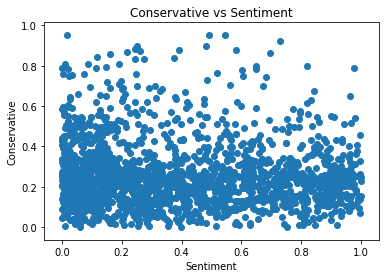

In [33]:
plt.scatter(sentiment, conservative)
plt.title('Conservative vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Conservative')
plt.show()


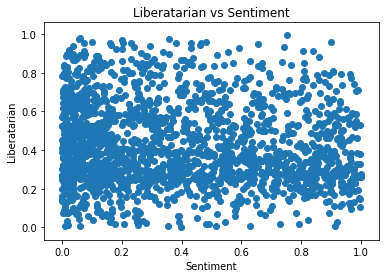

In [34]:
plt.scatter(sentiment, libertarian)
plt.title('Liberatarian vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Liberatarian')
plt.show()


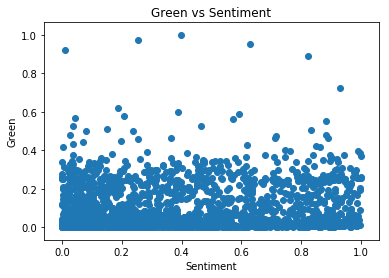

In [35]:
plt.scatter(sentiment, green)
plt.title('Green vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Green')
plt.show()


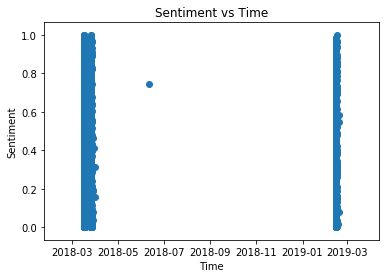

In [36]:
plt.scatter(time, sentiment)
plt.title('Sentiment vs Time')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.show()

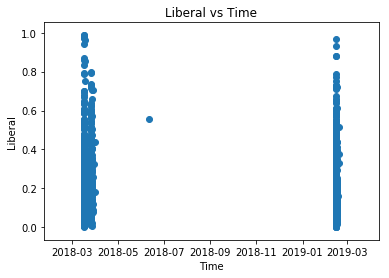

In [37]:
plt.scatter(time, liberal)
plt.title('Liberal vs Time')
plt.xlabel('Time')
plt.ylabel('Liberal')
plt.show()

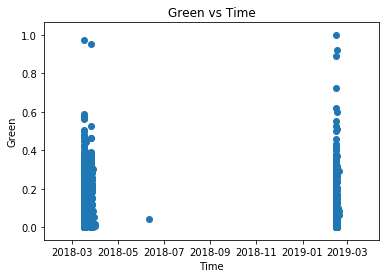

In [38]:
plt.scatter(time, green)
plt.title('Green vs Time')
plt.xlabel('Time')
plt.ylabel('Green')
plt.show()

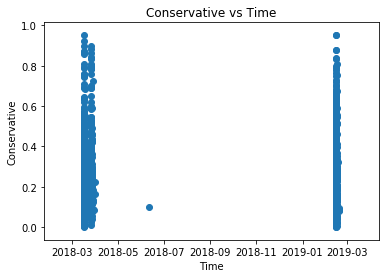

In [39]:
plt.scatter(time, conservative)
plt.title('Conservative vs Time')
plt.xlabel('Time')
plt.ylabel('Conservative')
plt.show()

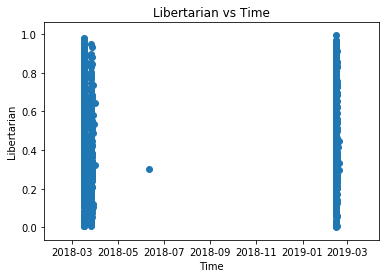

In [40]:
plt.scatter(time, libertarian)
plt.title('Libertarian vs Time')
plt.xlabel('Time')
plt.ylabel('Libertarian')
plt.show()

In [102]:

 
# Create data
# create data
y = [ 2,4,6,8,10,12,14,16,18,20 ]
x = [customdate + datetime.timedelta(hours=i) for i in range(len(y))]
 
# plot
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.show()

AttributeError: type object 'datetime.datetime' has no attribute 'timedelta'

In [24]:
indicoio.sentiment_hq("data['comments']['t3_aqfeq0']['body']")


0.34594056

In [23]:
indicoio.political("data['comments']['t3_aqfeq0']['body']")

{'Green': 0.45354015,
 'Libertarian': 0.2002119,
 'Conservative': 0.1831735,
 'Liberal': 0.16307451}